In [1]:
from resources.netlist_generator import generate_flyback_netlist
from matplotlib import pyplot as plt

# Flyback Design
![Schematic](resources/schmatic.png)

# Input parameters

In [2]:
Vin = 311       # Input voltage (VIN) 32V to 78V
Vout = 12       # Output voltage (VOUT)
Iout = 1        # Output current (IOUT)
OpMode = "DCM"  # Operation mode
KFR = 1         # Ripple factor (KFR) 1
Dmax = 0.5      # Maximum duty cycle (DMAX) 0.5
fs = 160e3      # Switching frequency (fSW) 160kHz
eff = 0.8       # Estimated efficiency (η)  80%

In [3]:
N=10
D=Vout/(Vin/N); D
Ts=1/fs
DT = D*Ts
dI = 10
L=Vin*D**2/(fs*dI); print(f"{L=:.5}")

L=2.8939e-05


Calling Ngspice for generated netlist...
ngspice compiled from ngspice revision 31
Written originally by Berkeley University
Currently maintained by the NGSpice Project

Copyright (C) 1985-1996,  The Regents of the University of California
Copyright (C) 1999-2011,  The NGSpice Project


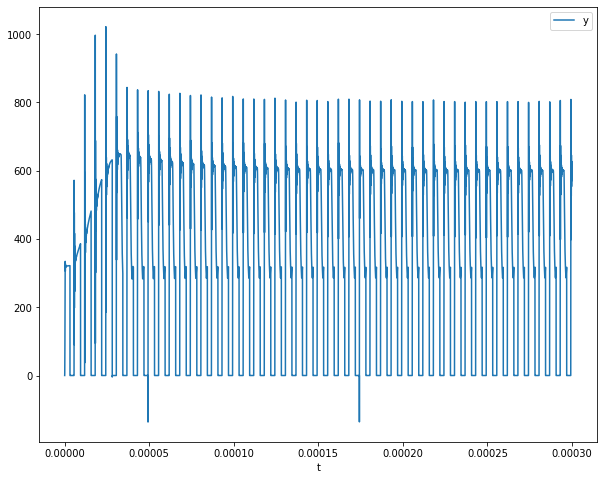

In [4]:

generate_flyback_netlist();

# References
https://www.monolithicpower.com/en/how-to-design-a-flyback-converter-in-seven-steps